# BoomBikes - Bikesharing:
### Probem statement:

BoomBikes is a provider for Bike-sharing in US, wants to predict and understand the demand for shared bikes among the people after COVID-19 pandemic, to improve revenue based on factors which affecting demand for shared bikes in American market.
 - Which variables are significant in predicting the demand for shared bikes.
 - How well those variables describe the bike demands
 
### Business Goal:
Model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations.

### Steps:
  (1) Data loading.<br>
  (2) Data cleaning.<br>
  (3) Data analysis and manipulations.<br>
  (4) Data split in Train,test.<br>
  (5) Scaling train data.<br>
  (6) Feature selection<br>
  (7) Model training.<br>
  (8) Analyzing model parameters.<br>
  (9) Analizing assumptions.<br>
  (10) Scaling test dataset.<br>
  (11) Prediction on test set.<br>
  (12) Analyzing predictions.<br>

In [1]:
# Importing nessasary python libraries
# importing basic libraries for data reading and analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
# Importing libraries for model devolopment
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Data loading:

In [2]:
df_sharing = pd.read_csv("day.csv")
df_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
df_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
df_sharing.shape

(730, 16)

As per input data, we can observe the following points:
 - There are 730 entries or data points from input provided
 - Data has 16 inital columns including independent and dependent target variable.
 - There is one categorical variable from initial data named 'dteday'

## Data cleaning:

As per observation from initial data there are no null/missing values present in data also the data is well organized with single header.
But there is one columned <b>'instant'</b> indicates record index which is not required for <b>model development</b> and analysis so we can remove this column

Also the columns <b>casual</b> and <b>registered</b> are number of bookings happens from causual and refistered users and as per data dictionary sum of these 2 variables results in <b>'cnt'</b> target variable. So we can drop these columns.

In [6]:
df_sharing = df_sharing.drop('instant', axis=1)
df_sharing = df_sharing.drop('registered', axis=1)
df_sharing = df_sharing.drop('casual', axis=1)
df_sharing.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Data analysis and manipulations:
### univariate analysis on categorical variables

### dteday:
This column represents date when bike-sharing booking happens.
Here we can create a new column with <b>day</b> for analysis. Month and year information has already present in columns 'mnth' and 'yr' so we are not going to create new columns for those attributes here.

In [7]:
df_sharing['day'] = pd.to_datetime(df_sharing['dteday'], format="%d-%m-%Y").dt.day
df_sharing.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,3
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,4
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,5


Now we can drop <b>dteday</b> column because not we have date information in remaining columns. 

In [8]:
df_sharing = df_sharing.drop('dteday', axis=1)
df_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,3
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,4
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,5


also we can check is there any relation between attribute day and target variable.

<Axes: title={'center': 'Bookings vs day of month'}, xlabel='day', ylabel='yr'>

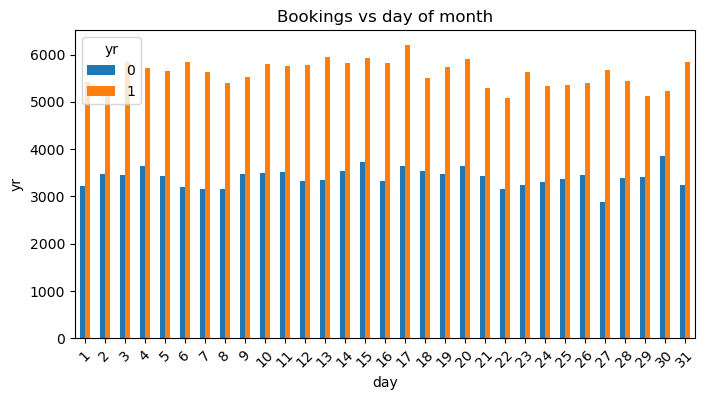

In [9]:
pt_day = pd.pivot_table(df_sharing, values='cnt', index='day', columns='yr', aggfunc='mean')
pt_day.plot(kind='bar', figsize=(8, 4), rot=45,  ylabel='yr', title="Bookings vs day of month")

There is no significant change or correlation observed between day of booking and number of bookings so we can drop 'day' column from out analysis.

In [10]:
df_sharing = df_sharing.drop('day', axis=1)
df_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### season:
This column represents season information in categorical data with 4 types. As per data dictionary these column values represents following information.
 1:spring<br>
 2:summer<br>
 3:fall<br>
 4:winter<br>
First we will visualize these in <b>bar</b> chart and analyze.

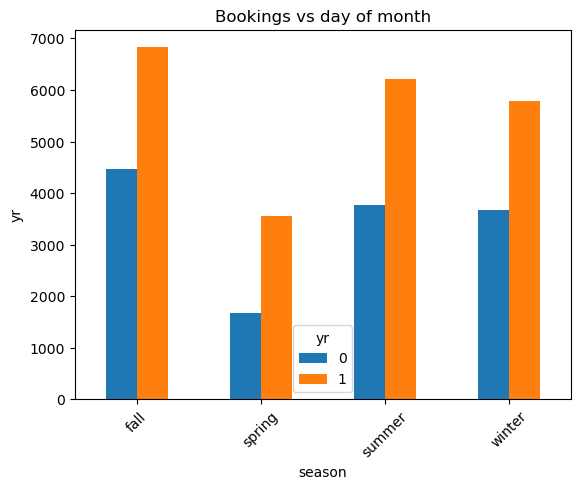

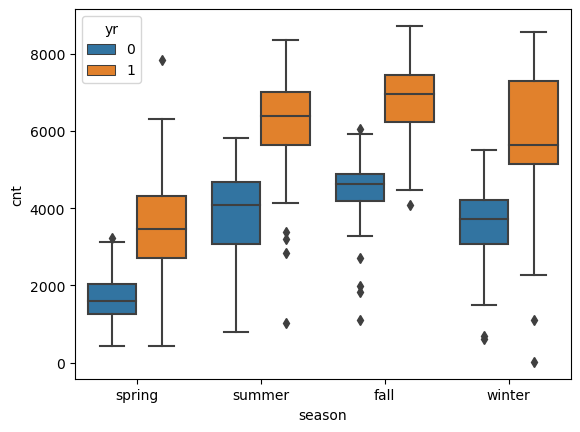

In [11]:
df_sharing.season = df_sharing.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
pt_season = pd.pivot_table(df_sharing, values='cnt', index='season', columns='yr', aggfunc='mean')
pt_season.plot(kind='bar', rot=45,  ylabel='yr', title="Bookings vs day of month")
plt.show()
sns.boxplot(x = 'season', y = 'cnt', hue = 'yr', data = df_sharing)
plt.show()

As per above distribution plot we can observe that there is a clear correlation between attribute <b>season</b> and target variable <b>cnt</b> during years 2018(0) and 2019(1).
Higher number of bookings happened in 'fall' and 'summer' 
<b>season</b> is not a <b>ordered</b> categorical variable and each season is independent of other. So we can make new numerical <b>dummy Variables</b> from <b>season</b> column for model development as follows.

In [12]:
season_dummy = pd.get_dummies(df_sharing['season'], drop_first = True)
season_dummy = season_dummy.astype(int)
df_sharing = pd.concat([df_sharing, season_dummy], axis = 1)
# now drop 'season' column from data
df_sharing = df_sharing.drop('season', axis=1)
df_sharing.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


### yr:

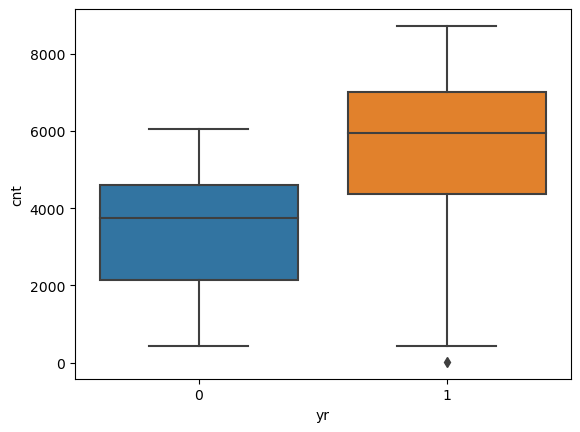

In [13]:
sns.boxplot(x = 'yr', y = 'cnt', data = df_sharing)
plt.show()

From the above distribution plot we can clearly observe that there is a significant improvement in bookings in 2019(1) compared with 2018(0). But this column represents year value for new we will keep this column for our analysis.

### mnth:
This column represents month of the year when booking happened.

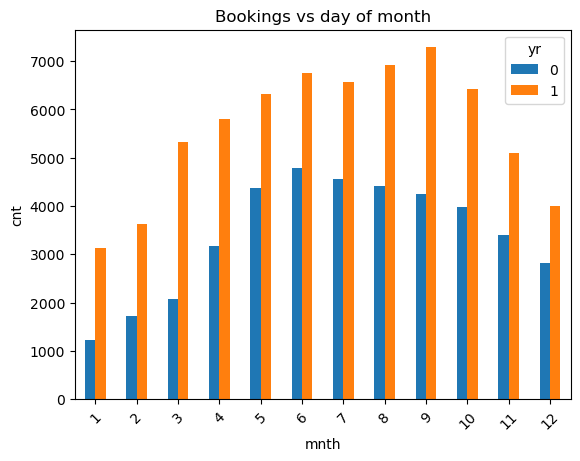

In [14]:
pt_month = pd.pivot_table(df_sharing, values='cnt', index='mnth', columns='yr', aggfunc='mean')
pt_month.plot(kind='bar', rot=45,  ylabel='cnt', title="Bookings vs day of month")
plt.show()

From the above plot, most number of bookings are happened in September-2019 and June-2018 , and there is significant relation between month of the year and bookings.

### holiday:
This column represents whether booking is on holiday(1) or not(0)

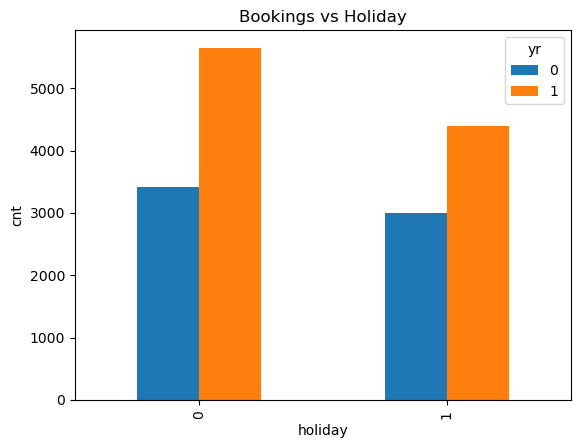

In [15]:
pt_month = pd.pivot_table(df_sharing, values='cnt', index='holiday', columns='yr', aggfunc='mean')
pt_month.plot(kind='bar',  ylabel='cnt', title="Bookings vs Holiday")
plt.show()

From the above plot we can observe that most of the bookings happened in working day. So Bike-sharing might be mostly used by employees.

### weekday:
This column represents day of the week when booking happened.

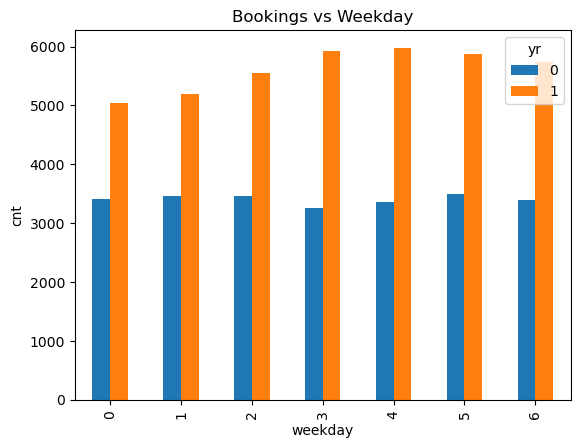

In [16]:
pt_weekday = pd.pivot_table(df_sharing, values='cnt', index='weekday', columns='yr', aggfunc='mean')
pt_weekday.plot(kind='bar',  ylabel='cnt', title="Bookings vs Weekday")
plt.show()

The variable 'weekday' shows that 
 - Target variable 'cnt' in increasing from day 0 to 4 and decreasing from day-4 to day-6 in year 2019.
 - Target variable 'cnt' in consistent in day-0, day-1, day-2, day-5, day-6, decreasing in  day-3, day-4 in year 2018.

### workingday:
This column describes if day is neither weekend nor holiday is 1, otherwise is 0.

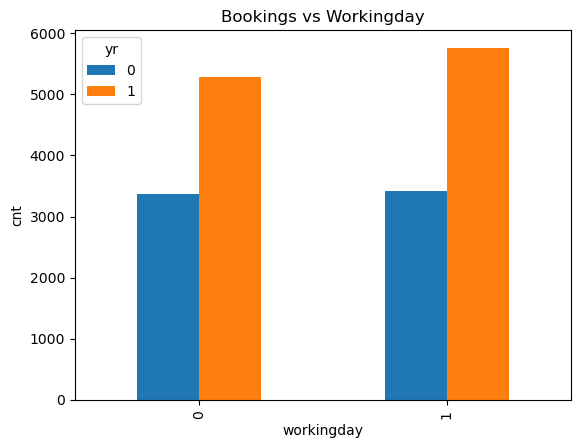

In [17]:
pt_workingday = pd.pivot_table(df_sharing, values='cnt', index='workingday', columns='yr', aggfunc='mean')
pt_workingday.plot(kind='bar',  ylabel='cnt', title="Bookings vs Workingday")
plt.show()

From the above plot we can observe that there is an increase in bookings on working day compared to non-working day.

### weathersit:
As per data dictionary this column represents weather condition as follows.<br>
 1: Clear, Few clouds, Partly cloudy, Partly cloudy <br>
 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<br>
 
The weather conditions labeled with each category are independent in nature, so we should make <b>dummy variables</b> from each weather condition from above list as follows.
But there is no value of <b>weathersit==4</b> so we can skip this category from list.

In [18]:
set(df_sharing['weathersit'])

{1, 2, 3}

As per observation from type of <b>weathersit</b>s there is no overlap between categories except 'Few clouds' between categories 1 and 2.
If there are many overlapping attributes between all three categories 1,2 and 3. Then we need to create dummy variables for each attribute from 'weathersit'.
But in this scenario making separate columns are features for each attribute will result in too much complexity in model development and which might also result in over fitting problem.

So we can create dummy variables for each <b>weathersit</b> as follows.

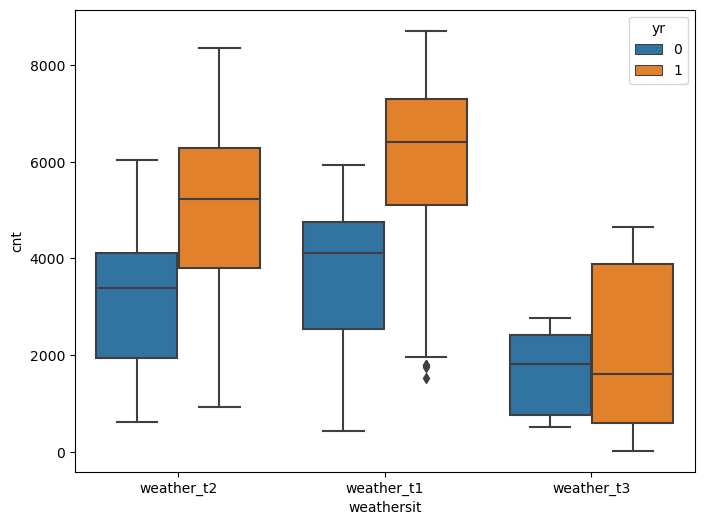

In [19]:
# list all unique weather states.
weather_state = {1: 'weather_t1',
                 2: 'weather_t2',
                 3: 'weather_t3',
                }
df_sharing.weathersit = df_sharing.weathersit.map(weather_state)
plt.figure(figsize=(8, 6))
sns.boxplot(x = 'weathersit', y = 'cnt', hue = 'yr', data = df_sharing)
plt.show()

In [20]:
weathersit_dummy = pd.get_dummies(df_sharing['weathersit'], drop_first = True)
weathersit_dummy = weathersit_dummy.astype(int)
df_sharing = pd.concat([df_sharing, weathersit_dummy], axis = 1)
# now drop 'weathersit' column from data
df_sharing = df_sharing.drop('weathersit', axis=1)
df_sharing.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,weather_t2,weather_t3
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,1,0
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,1,0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0


From the above plot we can observe that more number of the bookings happened when there is no<br>

- 2 -> No Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3 -> Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

### Uni variate analysis on continuous variables:
There are 4 continuous variables as follows.<br>
- temp : temperature in Celsius<br>
- atemp: feeling temperature in Celsius<br>
- hum: humidity<br>
- windspeed: wind speed<br>
To analyze these data we can use pairplot with target variable as follows

Lets understand the distribution of continuous variables as follows.

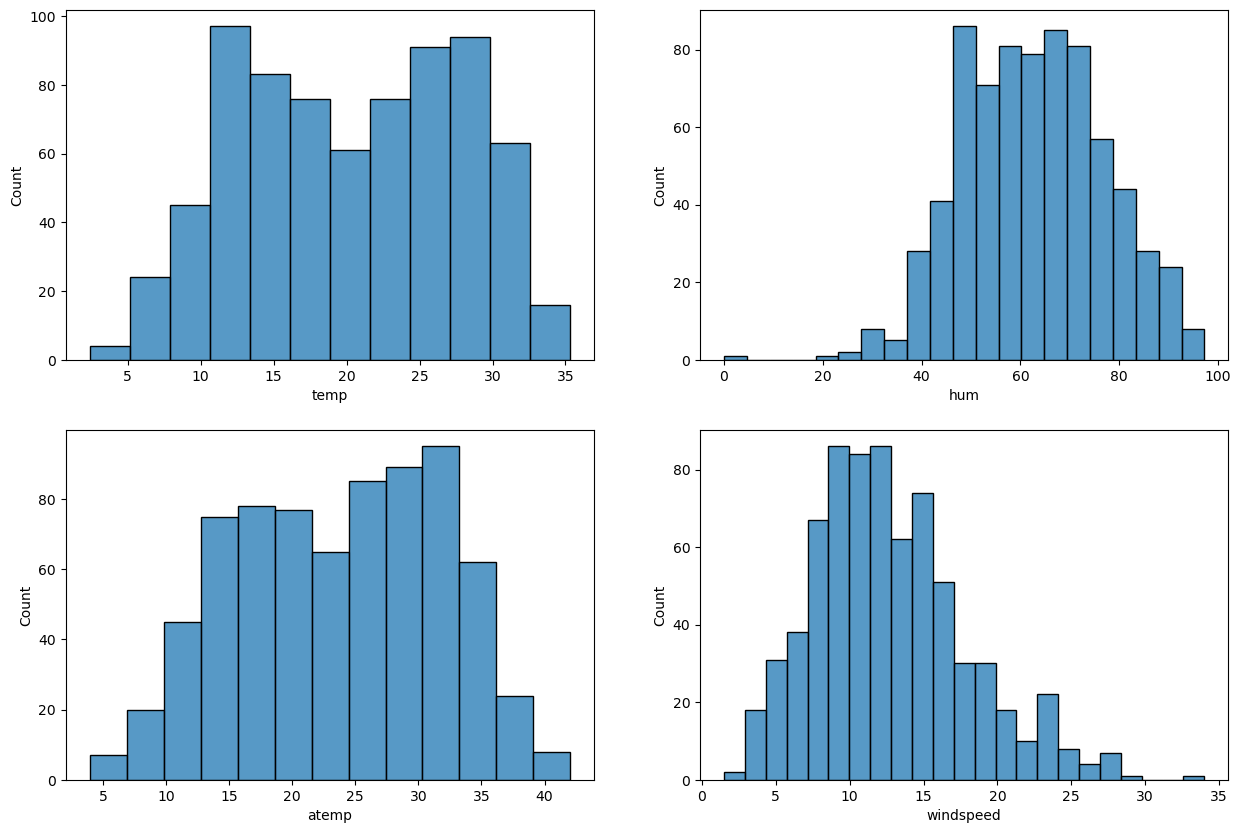

In [21]:
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)
sns.histplot(x = 'temp', data = df_sharing)
plt.subplot(2,2,2)
sns.histplot(x = 'hum', data = df_sharing)
plt.subplot(2,2,3)
sns.histplot(x = 'atemp', data = df_sharing)
plt.subplot(2,2,4)
sns.histplot(x = 'windspeed', data = df_sharing)
plt.show()

As per above plot we can observe that humidity column has one ab-normal value hum=0 this is an impossible case. So we can drop this rows where humidity<=0.

In [22]:
# Drop row where hummidity==0
df_sharing = df_sharing[df_sharing.hum > 0.0]

#### Understand correlation between continuas variables:

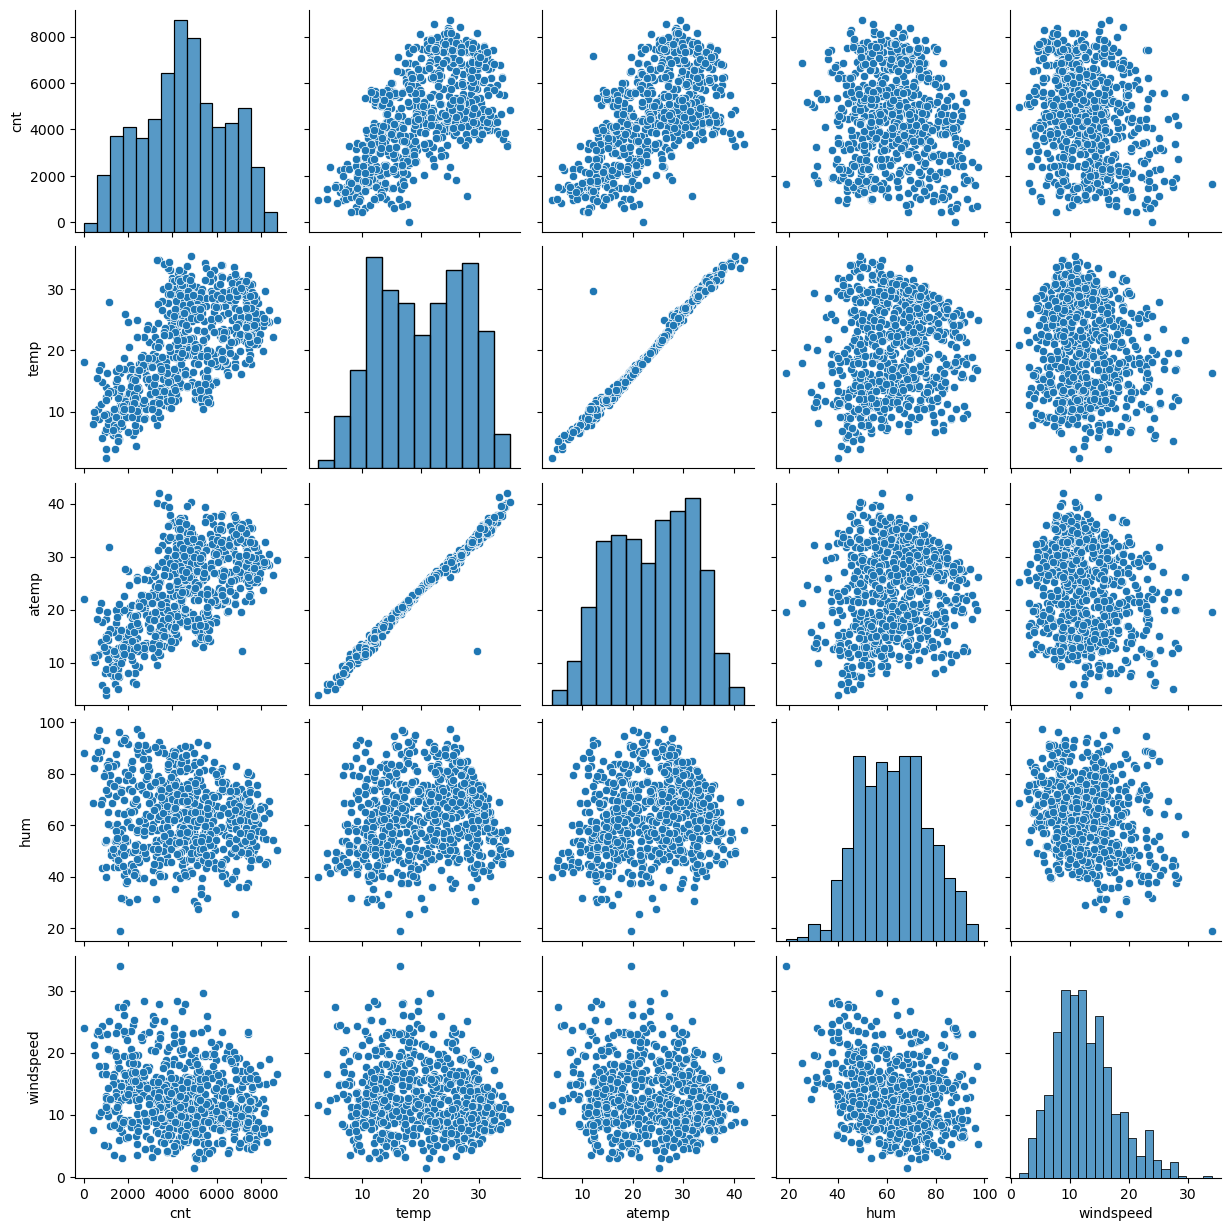

In [23]:
sns.pairplot(df_sharing[['cnt','temp','atemp', 'hum','windspeed']])
plt.show()

<b>Observations from continuous variables</b><br>
 - There is a significant correlation between temperature and target variable.<br>
 - There is not much correlation between humidity and target variable.<br>
- There is not much correlation between windspeed and target variable.<br>

<Axes: >

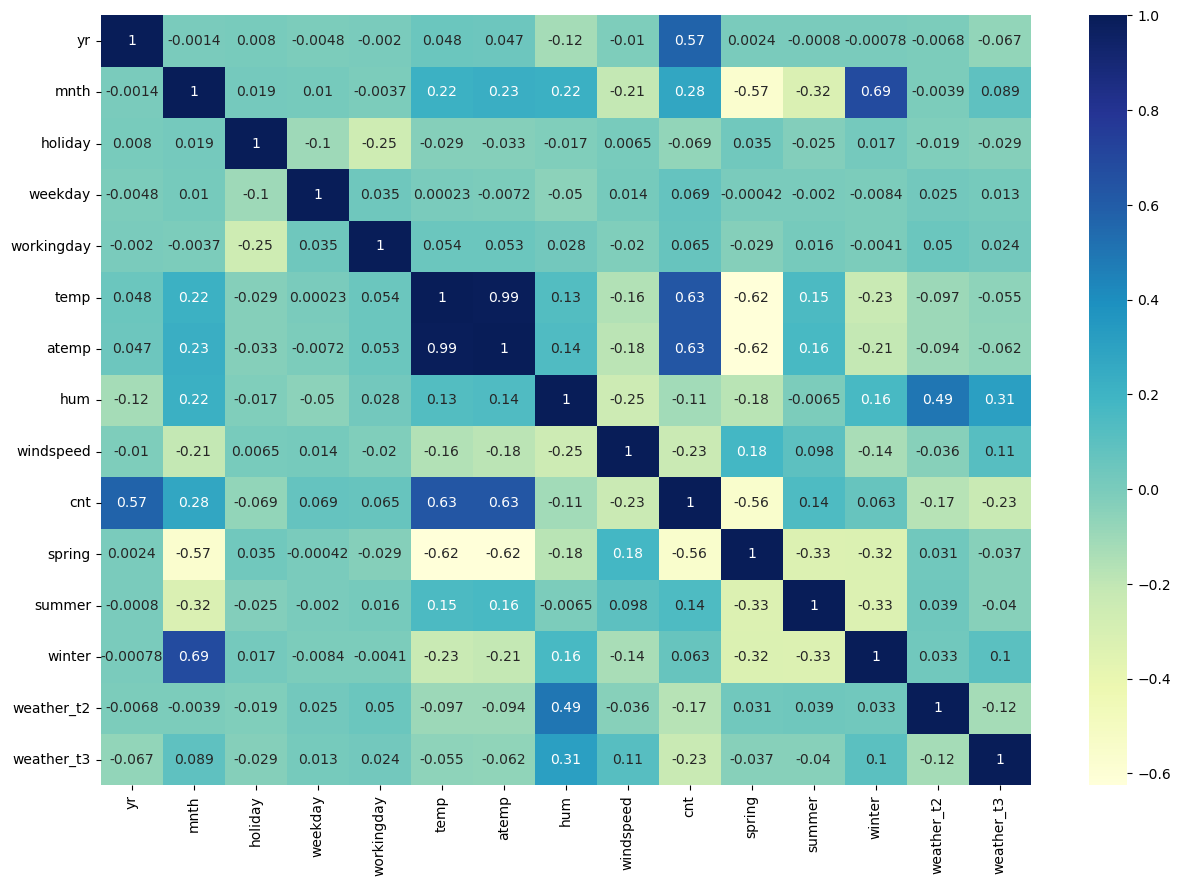

In [24]:
plt.figure(figsize=(15, 10))
column_names = df_sharing.columns
corr_coeaf = df_sharing[column_names].corr()
sns.heatmap(corr_coeaf, annot = True, cmap="YlGnBu")

## Data split train-test:
Up to now we have analyzed and filtered input data for understanding the relation between independent variables and target variable. Now we can proceed for data separation for training and testing model. as follows.

In [25]:
np.random.seed(0)
df_train, df_test = train_test_split(df_sharing, train_size = 0.7, test_size = 0.3, random_state = 100)

## Scaling train data.
After splitting data to training and test sets, next step is to re-scale available data to normalize model output. Here we are using min-max scaling for out model development as follows.

In [26]:
df_sharing.columns

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'cnt', 'spring', 'summer', 'winter', 'weather_t2',
       'weather_t3'],
      dtype='object')

In [27]:
scaler = MinMaxScaler()
variables_scalling = df_sharing.columns#['mnth','temp', 'weekday','atemp', 'hum', 'windspeed', 'cnt', 'quarter', 'dpt']
df_train[variables_scalling] = scaler.fit_transform(df_train[variables_scalling])
df_train[variables_scalling].describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,weather_t2,weather_t3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.511765,0.510339,0.027451,0.493137,0.674510,0.540678,0.541209,0.571669,0.318011,0.496352,0.243137,0.243137,0.247059,0.349020,0.021569
std,0.500352,0.315251,0.163554,0.336603,0.469018,0.225277,0.221255,0.182541,0.170567,0.235715,0.429398,0.429398,0.431725,0.477128,0.145413
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.272727,0.000000,0.166667,0.000000,0.350497,0.357237,0.431818,0.192829,0.333213,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.545455,0.000000,0.500000,1.000000,0.540519,0.552927,0.575578,0.296767,0.498008,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.818182,0.000000,0.833333,1.000000,0.742223,0.731274,0.704680,0.414082,0.685832,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


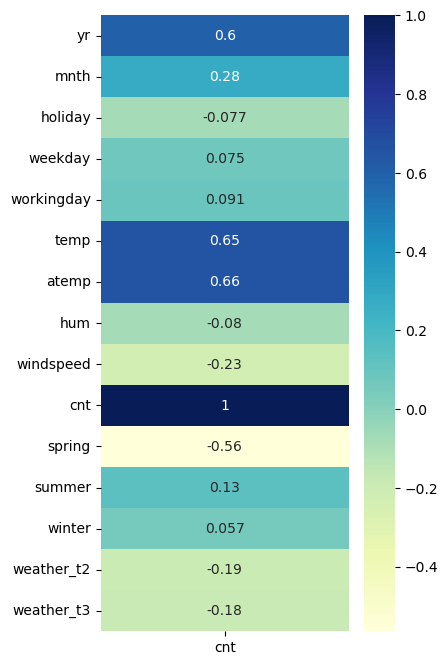

In [28]:
# Let's check the correlation to see which variables are highly correlated with target variable
plt.figure(figsize = (4, 8))
sns.heatmap(df_train.corr().loc[:,['cnt']], annot = True, cmap="YlGnBu")
plt.show()

### Dividing into input-X and expected output-Y sets for the model building
Next step is to separate target variable and independent predictor variables as follows.

In [29]:
y_train = df_train.pop('cnt')
X_train = df_train

## Feature selection:

After preparation of input and output variables we need to select features to train the model.
To do feature selection first we use automatic feature selection algorithm named <b>Recursive feature elimination</b> as follows.

In [30]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('mnth', False, 8),
 ('holiday', False, 2),
 ('weekday', False, 5),
 ('workingday', False, 7),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 6),
 ('winter', False, 3),
 ('weather_t2', False, 4),
 ('weather_t3', True, 1)]

In [31]:
selected_features_rfe = X_train.columns[rfe.support_]
selected_features_rfe

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'spring', 'weather_t3'], dtype='object')

Out of 14 input features RFE has given rank 1 for 7 features. SO we will start model building using these selected features.

##  Model training:

In [32]:
# Function to compute Varience inflation factor
def compute_vif(X_train):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [33]:
# Function to process Ordinary Least Squares regression and Variance Inflation Factor
def train_model(X_train, y_train):
    # Adding a constant variable 
    X_train_lm = sm.add_constant(X_train)
    # Train model
    lm_bike_sharing = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
    # compute VIF for current X_train data
    vif = compute_vif(X_train)
    return lm_bike_sharing, vif

#### Building model-V1:

In [34]:
lm_bike_sharing_v1, vif = train_model(X_train[selected_features_rfe], y_train)
#Let's see the summary of our linear model
print(lm_bike_sharing_v1.summary())
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     297.5
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          4.17e-174
Time:                        23:52:20   Log-Likelihood:                 431.73
No. Observations:                 510   AIC:                            -847.5
Df Residuals:                     502   BIC:                            -813.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3445      0.027     12.744      0.0

#### Dropping in-significant variable temp:
As per model summery we can observe that the <b>P</b> value and <b>VIF</b> for independent variable <b>temp</b> are in-significant. So we can drop this feature from model development.

In [35]:
selected_features_rfe_v2 = selected_features_rfe.drop('temp')

#### Re-building model-V2:

In [36]:
lm_bike_sharing_v2, vif = train_model(X_train[selected_features_rfe_v2], y_train)
#Let's see the summary of our linear model
print(lm_bike_sharing_v2.summary())
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     346.5
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          4.57e-175
Time:                        23:52:20   Log-Likelihood:                 430.96
No. Observations:                 510   AIC:                            -847.9
Df Residuals:                     503   BIC:                            -818.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3430      0.027     12.695      0.0

#### Dropping in-significant variable hum:
As per model summery we can observe that the <b>VIF</b> for independent variable <b>atemp</b> is high, But this variable has very good correlation with target variable.
So we can <b>drop 'hum'</b> variable from the model development and re-build model.

In [37]:
selected_features_rfe_v3 = selected_features_rfe_v2.drop('hum')

#### Re-building model-V3:

In [38]:
lm_bike_sharing_v3, vif = train_model(X_train[selected_features_rfe_v3], y_train)
#Let's see the summary of our linear model
print(lm_bike_sharing_v3.summary())
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     371.3
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          2.19e-166
Time:                        23:52:20   Log-Likelihood:                 407.60
No. Observations:                 510   AIC:                            -803.2
Df Residuals:                     504   BIC:                            -777.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2173      0.021     10.354      0.0

#### Adding key variables from initial analysis:

As per ranking given by RFE algorithm model development started with features selected with rank '1'. Now we are going to tune model with high ranking features from RFE algorithm.
Note that following features selected listed after multiple iterations.

In [39]:
selected_features_rfe_v4 = selected_features_rfe_v3.append(pd.Index([ 'holiday','winter', 'weather_t2', 'weekday']))
lm_bike_sharing_v4, vif = train_model(X_train[selected_features_rfe_v4], y_train)
#Let's see the summary of our linear model
print(lm_bike_sharing_v4.summary())
print(lm_bike_sharing_v4.params.sort_values())
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.4
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          1.12e-180
Time:                        23:52:20   Log-Likelihood:                 453.04
No. Observations:                 510   AIC:                            -886.1
Df Residuals:                     500   BIC:                            -843.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1811      0.026      6.841      0.0

## Residual Analysis of the train data:
After successful model build the nest step is to analyze and observe assumptions and residuals as follows.
check if the error terms are normally distributed, the major assumption of linear regression

Text(0.5, 0, 'Errors')

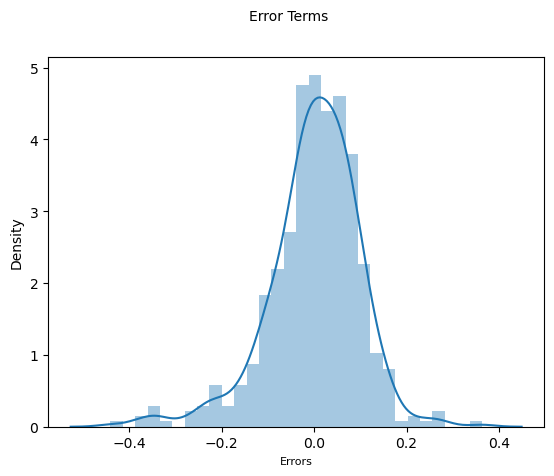

In [40]:
# Assumption 1: error terms are narmally distributed
X_train_lm = sm.add_constant(X_train[selected_features_rfe_v4])
y_train_pred = lm_bike_sharing_v4.predict(X_train_lm)
fig = plt.figure()
sns.distplot((y_train - y_train_pred))
fig.suptitle('Error Terms', fontsize = 10)                  # Plot heading 
plt.xlabel('Errors', fontsize = 8)


In [41]:
round((y_train - y_train_pred).sum(), 2)

-0.0

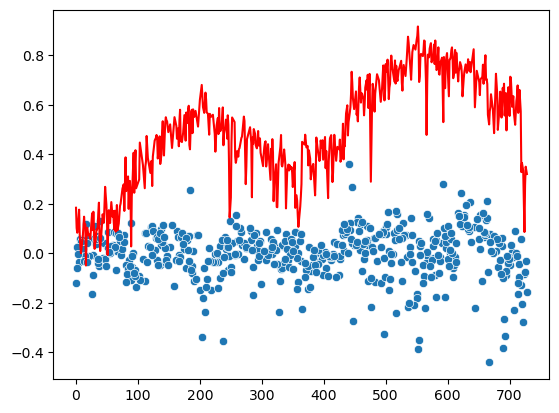

Correlation between residuals and y_train_pred:  0.0


In [42]:
# Assumption 2: The error terms should not be dependent on one another.
sns.scatterplot((y_train - y_train_pred))
sns.lineplot(y_train_pred,color='red')
plt.show()
print("Correlation between residuals and y_train_pred: ",round(y_train_pred.corr((y_train - y_train_pred)), 4))

In [43]:
# Assumption 3: Error terms have constant variance:
print("Varience of error terms :", np.var((y_train - y_train_pred)))

Varience of error terms : 0.009907198510584716


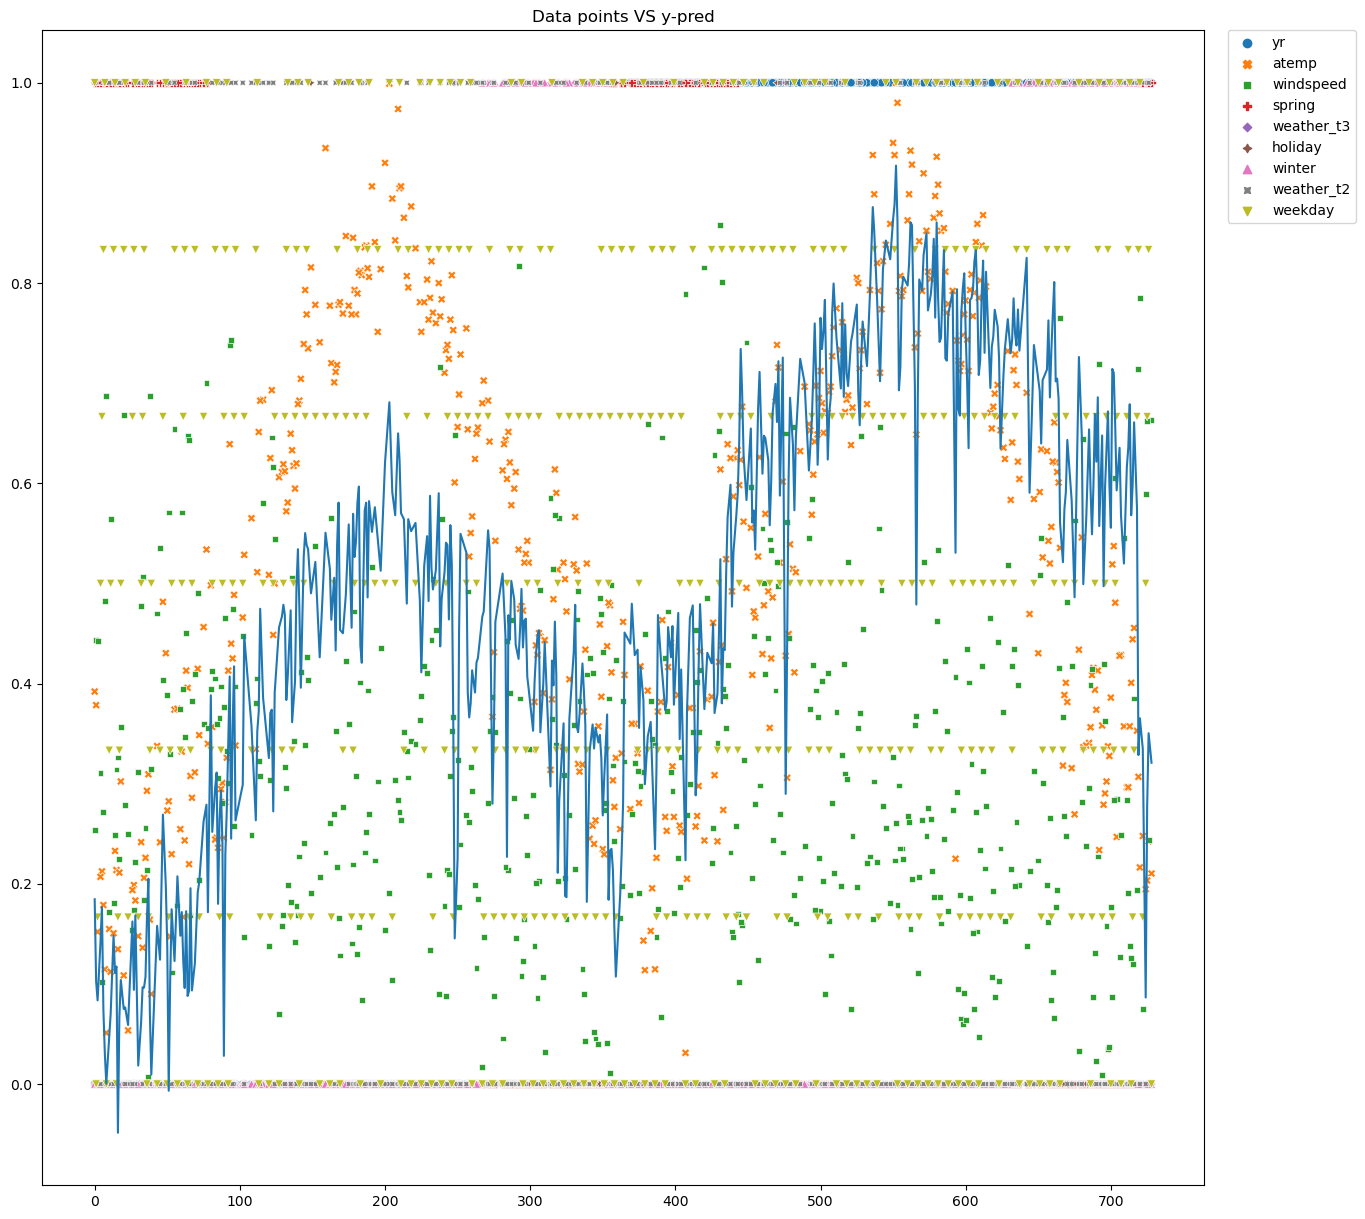

In [44]:
# Assumption 4: Linear relation ship between independent variables and predicted dependent variable.
plt.figure(figsize=(15, 15))
sns.scatterplot(data=X_train[selected_features_rfe_v4])
sns.lineplot(y_train_pred)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("Data points VS y-pred")
plt.show()


## Scaling test dataset:

In [45]:
scalled_features = df_sharing.columns
df_test[scalled_features] = scaler.transform(df_test[scalled_features])
df_test.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,weather_t2,weather_t3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.474886,0.485264,0.031963,0.513699,0.703196,0.551850,0.553801,0.562174,0.319257,0.484718,0.251142,0.273973,0.237443,0.310502,0.041096
std,0.500513,0.309882,0.176306,0.329976,0.457896,0.235346,0.232749,0.179169,0.157824,0.227716,0.434663,0.447017,0.426491,0.463759,0.198967
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.027237,0.131791,-0.042808,-0.049378,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.272727,0.000000,0.166667,0.000000,0.336479,0.345502,0.427649,0.213225,0.330677,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.454545,0.000000,0.500000,1.000000,0.561806,0.576424,0.548144,0.303481,0.497042,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.727273,0.000000,0.833333,1.000000,0.746636,0.729541,0.689408,0.400400,0.635156,0.500000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.983385,1.049574,1.012910,0.807474,0.941205,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test:

In [46]:
y_test = df_test.pop('cnt')
X_test = df_test[selected_features_rfe_v4]
X_test.head()

,yr,atemp,windspeed,spring,weather_t3,holiday,winter,weather_t2,weekday
185,0.0,0.850415,0.180484,0.0,0.0,0.0,0.0,0.0,0.333333
639,1.0,0.638242,0.133655,0.0,1.0,0.0,1.0,0.0,0.333333
300,0.0,0.330295,0.402389,0.0,0.0,0.0,1.0,1.0,0.833333
222,0.0,0.788671,0.263333,0.0,0.0,0.0,0.0,0.0,0.666667
153,0.0,0.699963,0.453215,0.0,0.0,0.0,0.0,0.0,0.833333


## Prediction on test set:

In [47]:
# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test)
# Making predictions
y_test_pred = lm_bike_sharing_v4.predict(X_test_lm)

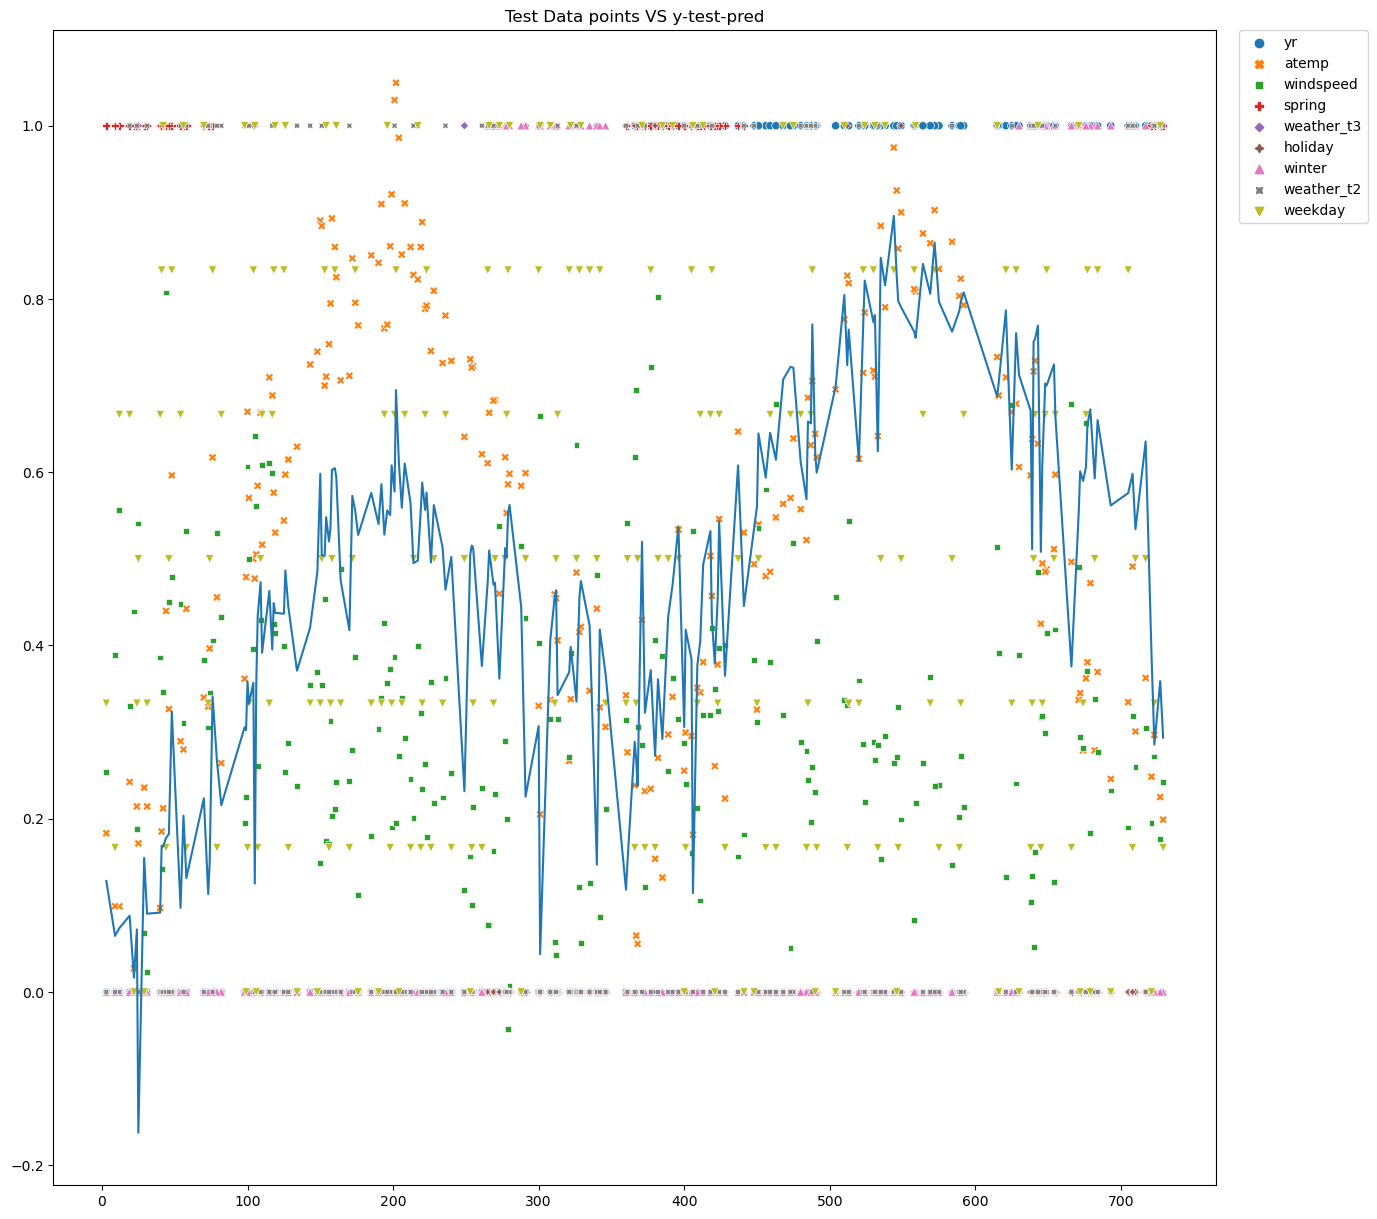

In [48]:
plt.figure(figsize=(15, 15))
sns.scatterplot(data=X_test)
sns.lineplot(y_test_pred)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("Test Data points VS y-test-pred")
plt.show()

## Analyzing predictions:

Text(0, 0.5, 'y_test_pred')

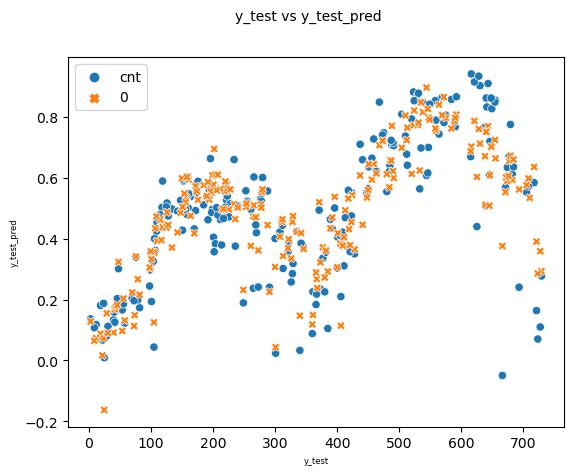

In [49]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
sns.scatterplot(pd.concat([y_test,y_test_pred],axis=1))
fig.suptitle('y_test vs y_test_pred', fontsize=10)              # Plot heading 
plt.xlabel('y_test', fontsize=6)                          # X-label
plt.ylabel('y_test_pred', fontsize=6)                          # Y-label

In [50]:
print("R2 score on test data predictions: ", r2_score(y_test, y_test_pred))

R2 score on test data predictions:  0.8101420231018357


### Residual analysis on test data predictions:

Text(0.5, 0, 'Errors')

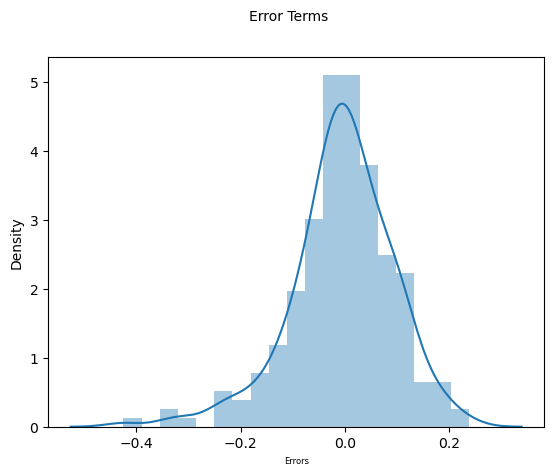

In [51]:
# Assumption: checking error terms are narmally distributed
fig = plt.figure()
sns.distplot((y_test - y_test_pred))
fig.suptitle('Error Terms', fontsize = 10)                  # Plot heading 
plt.xlabel('Errors', fontsize = 6)

### Observations:
 - R2-Score of test data predictions is 0.81 and train data is 0.821. So from the R2-score we can conclude that model is appropriately fitting the data.
 - Error terms of test data predictions are normally distributed so simple linear regression assumptions are satisfied.
 - Final selected features for model development are follows:
1) yr
2) atemp
3) windspeed
4) spring
5) weather_t3
6) holiday
7) winter
8) weather_t2
9) weekday





